In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open("./sceneGraphs/val_sceneGraphs.json", "r") as val_scenegraphs:
    data = val_scenegraphs.read()
    val_sg_json = json.loads(data)

In [3]:
print (val_sg_json['2353884']['width'])
print (val_sg_json['2353884']['height'])
print (val_sg_json['2353884']['objects'])

500
281
{'2716708': {'name': 'nose', 'h': 9, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}, {'object': '2370325', 'name': 'to the left of'}], 'w': 7, 'attributes': [], 'y': 54, 'x': 370}, '2370325': {'name': 'eyes', 'h': 4, 'relations': [{'object': '2493560', 'name': 'to the right of'}, {'object': '2716708', 'name': 'to the right of'}, {'object': '2449847', 'name': 'of'}], 'w': 6, 'attributes': [], 'y': 53, 'x': 379}, '2747168': {'name': 'sign', 'h': 52, 'relations': [{'object': '2449847', 'name': 'to the right of'}], 'w': 96, 'attributes': ['blue'], 'y': 124, 'x': 371}, '3576182': {'name': 'air', 'h': 194, 'relations': [], 'w': 492, 'attributes': [], 'y': 1, 'x': 2}, '3100523': {'name': 'ear', 'h': 12, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}], 'w': 11, 'attributes': [], 'y': 63, 'x': 389}, '2795769': {'name': 'socks', 'h': 19, 'relations': [{'object': '3576178', 'name': 't

In [4]:
print (val_sg_json['2353884']['objects'].keys())

dict_keys(['2716708', '2370325', '2747168', '3576182', '3100523', '2795769', '3576173', '2752960', '2449847', '1798567', '3576178', '3127901', '3127900', '2493560', '2077960', '3576175', '2237917', '1902903'])


In [5]:
for key in val_sg_json['2353884']['objects'].keys():
    print (str(key)+ " " + str(val_sg_json['2353884']['objects'][key]))

2716708 {'name': 'nose', 'h': 9, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}, {'object': '2370325', 'name': 'to the left of'}], 'w': 7, 'attributes': [], 'y': 54, 'x': 370}
2370325 {'name': 'eyes', 'h': 4, 'relations': [{'object': '2493560', 'name': 'to the right of'}, {'object': '2716708', 'name': 'to the right of'}, {'object': '2449847', 'name': 'of'}], 'w': 6, 'attributes': [], 'y': 53, 'x': 379}
2747168 {'name': 'sign', 'h': 52, 'relations': [{'object': '2449847', 'name': 'to the right of'}], 'w': 96, 'attributes': ['blue'], 'y': 124, 'x': 371}
3576182 {'name': 'air', 'h': 194, 'relations': [], 'w': 492, 'attributes': [], 'y': 1, 'x': 2}
3100523 {'name': 'ear', 'h': 12, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}], 'w': 11, 'attributes': [], 'y': 63, 'x': 389}
2795769 {'name': 'socks', 'h': 19, 'relations': [{'object': '3576178', 'name': 'to the left of'}], 'w': 28, 'attr

In [6]:
val_sg_list = []
for image_key in val_sg_json.keys():    
    val_sg_dict = {}
    val_sg_dict['vsg_key'] = image_key
    val_sg_dict['image_width'] = val_sg_json[image_key]['width']
    val_sg_dict['image_height'] = val_sg_json[image_key]['height']
    val_sg_list.append(val_sg_dict)

val_scenegraph_df = pd.DataFrame(val_sg_list)

In [7]:
val_scenegraph_df.head(20)

,vsg_key,image_width,image_height
0,2353884,500,281
1,2320168,331,500
2,2410049,375,500
3,2375361,500,400
4,2410046,500,375
5,2320162,375,500
6,2410041,500,334
7,2343566,500,333
8,2414600,500,313
9,2372860,500,375


In [8]:
object_sg_list = []
for image_key in val_sg_json.keys():    
    for object_key in val_sg_json[image_key]['objects'].keys(): 
        object_sg_dict = {}
        object_sg_dict['vsg_key'] = image_key
        object_sg_dict['object_key'] = object_key
        object_sg_dict['name'] = val_sg_json[image_key]['objects'][object_key]['name']
        object_sg_dict['height'] = val_sg_json[image_key]['objects'][object_key]['h']
        object_sg_dict['width'] = val_sg_json[image_key]['objects'][object_key]['w']
        object_sg_dict['y_val'] = val_sg_json[image_key]['objects'][object_key]['y']
        object_sg_dict['x_val'] = val_sg_json[image_key]['objects'][object_key]['x']
        object_sg_dict['attributes'] = ','.join(val_sg_json[image_key]['objects'][object_key]['attributes'])
        object_sg_list.append(object_sg_dict)

object_scenegraph_df = pd.DataFrame(object_sg_list)

In [9]:
object_scenegraph_df.head(20)

,vsg_key,object_key,name,height,width,y_val,x_val,attributes
0,2353884,2716708,nose,9,7,54,370,
1,2353884,2370325,eyes,4,6,53,379,
2,2353884,2747168,sign,52,96,124,371,blue
3,2353884,3576182,air,194,492,1,2,
4,2353884,3100523,ear,12,11,63,389,
5,2353884,2795769,socks,19,28,207,267,white
6,2353884,3576173,audience,48,302,233,196,
7,2353884,2752960,tent,280,497,0,0,
8,2353884,2449847,man,228,174,33,237,
9,2353884,1798567,woman,51,46,228,239,


In [10]:
object_relation_sg_list = []
for image_key in val_sg_json.keys():    
    for object_key in val_sg_json[image_key]['objects'].keys(): 
        for relation_dict in val_sg_json[image_key]['objects'][object_key]['relations']:
            object_relation_sg_dict = {}
            object_relation_sg_dict['vsg_key'] = image_key
            object_relation_sg_dict['object_key'] = object_key
            object_relation_sg_dict['relations_key'] = relation_dict['object']
            object_relation_sg_dict['name'] = relation_dict['name']
            object_relation_sg_list.append(object_relation_sg_dict)

object_relation_scenegraph_df = pd.DataFrame(object_relation_sg_list)

In [11]:
object_relation_scenegraph_df.head(20)

,vsg_key,object_key,relations_key,name
0,2353884,2716708,2449847,of
1,2353884,2716708,2493560,to the right of
2,2353884,2716708,2370325,to the left of
3,2353884,2370325,2493560,to the right of
4,2353884,2370325,2716708,to the right of
5,2353884,2370325,2449847,of
6,2353884,2747168,2449847,to the right of
7,2353884,3100523,2449847,of
8,2353884,3100523,2493560,to the right of
9,2353884,2795769,3576178,to the left of


In [12]:
val_object_scenegraph_df = pd.merge(val_scenegraph_df, object_scenegraph_df, on = 'vsg_key', how = 'left')

In [13]:
val_object_reation_scenegraph_df = pd.merge(val_object_scenegraph_df, object_relation_scenegraph_df, on = ['vsg_key', 'object_key'], how = 'left')

In [14]:
val_object_reation_scenegraph_df = val_object_reation_scenegraph_df.replace(np.nan, '', regex=True)

In [15]:
val_object_reation_scenegraph_df.head(20)

,vsg_key,image_width,image_height,object_key,name_x,height,width,y_val,x_val,attributes,relations_key,name_y
0,2353884,500,281,2716708,nose,9,7,54,370,,2449847,of
1,2353884,500,281,2716708,nose,9,7,54,370,,2493560,to the right of
2,2353884,500,281,2716708,nose,9,7,54,370,,2370325,to the left of
3,2353884,500,281,2370325,eyes,4,6,53,379,,2493560,to the right of
4,2353884,500,281,2370325,eyes,4,6,53,379,,2716708,to the right of
5,2353884,500,281,2370325,eyes,4,6,53,379,,2449847,of
6,2353884,500,281,2747168,sign,52,96,124,371,blue,2449847,to the right of
7,2353884,500,281,3576182,air,194,492,1,2,,,
8,2353884,500,281,3100523,ear,12,11,63,389,,2449847,of
9,2353884,500,281,3100523,ear,12,11,63,389,,2493560,to the right of


In [16]:
val_object_scenegraph_df[(val_object_scenegraph_df.vsg_key == '2353884')]

,vsg_key,image_width,image_height,object_key,name,height,width,y_val,x_val,attributes
0,2353884,500,281,2716708,nose,9.0,7.0,54.0,370.0,
1,2353884,500,281,2370325,eyes,4.0,6.0,53.0,379.0,
2,2353884,500,281,2747168,sign,52.0,96.0,124.0,371.0,blue
3,2353884,500,281,3576182,air,194.0,492.0,1.0,2.0,
4,2353884,500,281,3100523,ear,12.0,11.0,63.0,389.0,
5,2353884,500,281,2795769,socks,19.0,28.0,207.0,267.0,white
6,2353884,500,281,3576173,audience,48.0,302.0,233.0,196.0,
7,2353884,500,281,2752960,tent,280.0,497.0,0.0,0.0,
8,2353884,500,281,2449847,man,228.0,174.0,33.0,237.0,
9,2353884,500,281,1798567,woman,51.0,46.0,228.0,239.0,


In [17]:
import time
import sys
import os
import random
from skimage import io
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2
import tensorflow as tf

(334, 500, 3)


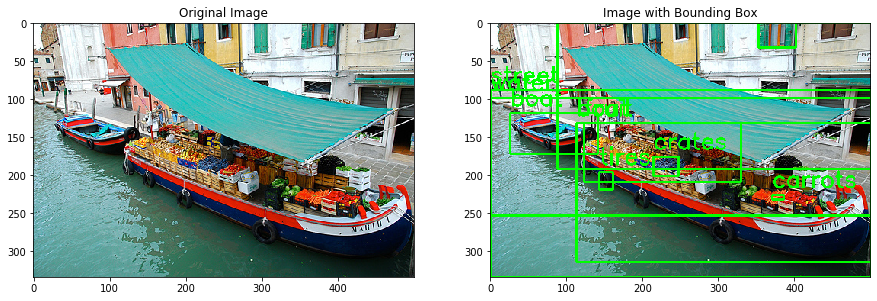

In [22]:
img_id = '2410041'
img = io.imread("./images/" + img_id + ".jpg")
height, width, _ = img.shape
print(img.shape)
img_bbox = img.copy()
temp_df = val_object_scenegraph_df[(val_object_scenegraph_df.vsg_key == img_id)]

for index, row in temp_df.iterrows():
    ymin = int(row['y_val'])
    ymax = int(row['y_val']) + int(row['height'])
    xmin = int(row['x_val'])
    xmax = int(row['x_val']) + int(row['width'])
    class_name = row['name']

    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),2)

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
    
plt.subplot(1,2,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)

plt.show()

plt.clf()
plt.cla()
plt.close()